Fork from Jake VanderPlas <vanderplas@astro.washington.edu> on [astroML](http://www.astroml.org/examples/datasets/plot_wmap_power_spectra.html)

In [7]:
import numpy as np
from matplotlib import pyplot as plt
import healpy as hp
from astroML.datasets import fetch_wmap_temperatures

In [8]:
wmap_unmasked = fetch_wmap_temperatures(masked=False)
wmap_masked = fetch_wmap_temperatures(masked=True)
white_noise = np.ma.asarray(np.random.normal(0, 0.062, wmap_masked.shape))

NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


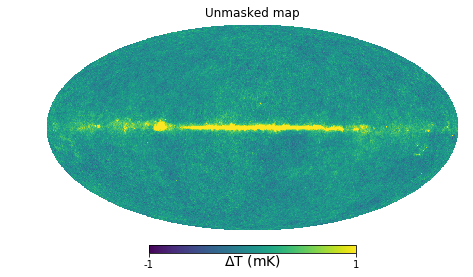

In [3]:
fig = plt.figure(1)
hp.mollview(wmap_unmasked, min=-1, max=1, title='Unmasked map',
            fig=1, unit=r'$\Delta$T (mK)')
plt.show()

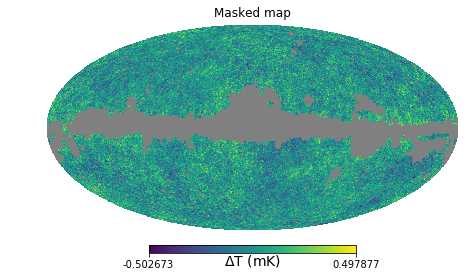

In [4]:
fig = plt.figure(2)
hp.mollview(wmap_masked.filled(), title='Masked map',
            fig=2, unit=r'$\Delta$T (mK)')
plt.show()

In [5]:
cl = hp.anafast(wmap_masked.filled(), lmax=1024)
ell = np.arange(len(cl))

cl_white = hp.anafast(white_noise, lmax=1024)

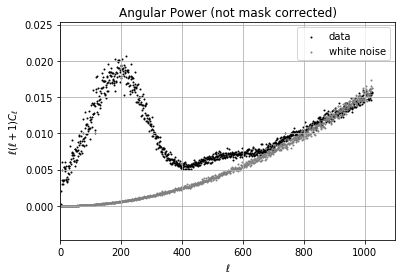

In [6]:
fig = plt.figure(3)
ax = fig.add_subplot(111)
ax.scatter(ell, ell * (ell + 1) * cl,
           s=4, c='black', lw=0,
           label='data')
ax.scatter(ell, ell * (ell + 1) * cl_white,
           s=4, c='gray', lw=0,
           label='white noise')

ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$\ell(\ell+1)C_\ell$')
ax.set_title('Angular Power (not mask corrected)')
ax.legend(loc='upper right')
ax.grid()
ax.set_xlim(0, 1100)

plt.show()